データの概要:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

データの統計情報:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   7

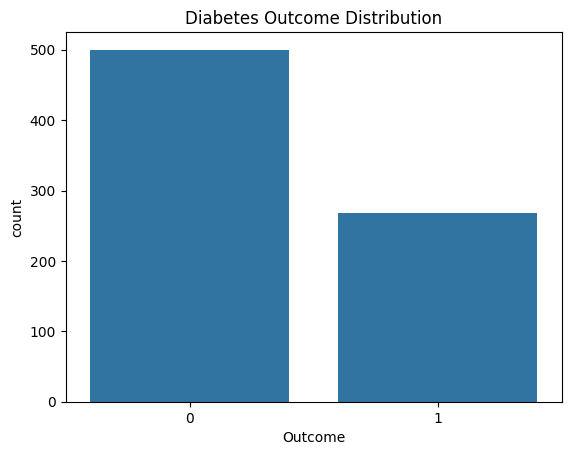

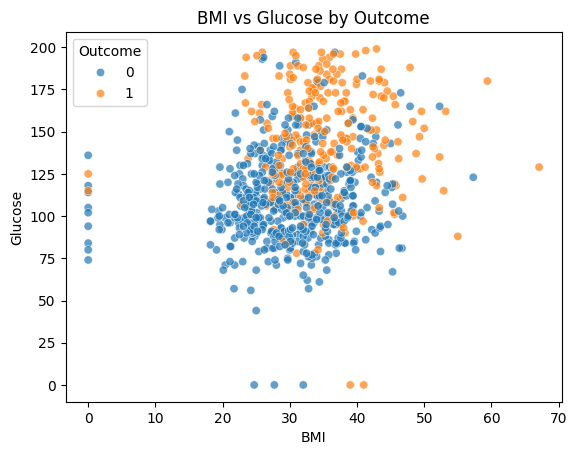


欠損値の確認:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

モデルの精度: 0.7207792207792207


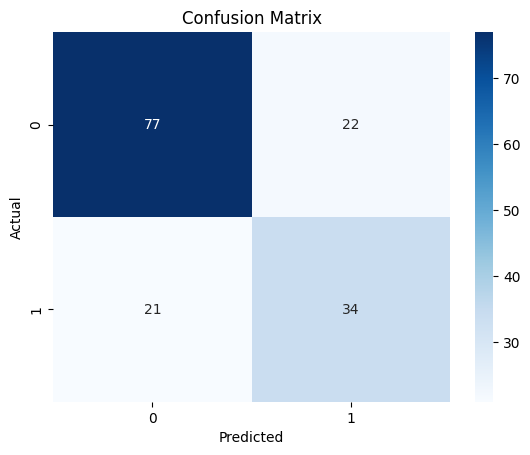


分類レポート:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [1]:
# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# データセットを読み込む
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, header=None, names=columns)

# データの基本情報を確認
print("データの概要:")
print(df.info())
print("\nデータの統計情報:")
print(df.describe())

# データの可視化
# 1. 糖尿病患者と非患者の分布
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

# 2. BMIと血糖値の散布図
sns.scatterplot(x="BMI", y="Glucose", hue="Outcome", data=df, alpha=0.7)
plt.title("BMI vs Glucose by Outcome")
plt.show()

# データの前処理
# 欠損値を確認
print("\n欠損値の確認:")
print(df.isnull().sum())

# 特徴量とターゲットに分ける
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの構築と訓練
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nモデルの精度:", accuracy)

# 混同行列
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 詳細な評価指標
print("\n分類レポート:")
print(classification_report(y_test, y_pred))
